In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data separation/transformation
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE # Recursive Feature Elimination¶

# statistics testing
import scipy.stats as stats

# system manipulation
import itertools
import os
import sys
sys.path.append("./util_")
import prepare_
import explore_

# other
import env
import warnings
warnings.filterwarnings("ignore")

# set the random seed
np.random.seed(95)

**Get data**

In [2]:
# This data is already been split and save
# This is only training data
train_scaled = pd.read_csv("./00_project_data/1-1_training_data.csv", index_col=0)
train_scaled = train_scaled.reset_index(drop=True)
train_scaled.head()

,tax_value,county,los_angeles,orange,ventura,bedrooms_scaled,bathrooms_scaled,sqr_feet_scaled,year_built_scaled,tax_amount_scaled
0,160657.0,Los Angeles,1,0,0,0.428571,0.428571,0.320064,0.405172,0.162429
1,243277.0,Orange,0,1,0,0.428571,0.142857,0.195839,0.448276,0.144717
2,285312.0,Los Angeles,1,0,0,0.428571,0.428571,0.411882,0.491379,0.174333
3,268523.0,Ventura,0,0,1,0.428571,0.285714,0.261252,0.706897,0.147458
4,339115.0,Los Angeles,1,0,0,0.428571,0.285714,0.382877,0.655172,0.217292


## Feature Selection

Use recursive feature elimination to select the top 4 features for predicting tax value.

In [3]:
# separate features from target
xtrain = train_scaled.drop(columns=["tax_value", "county", "tax_amount_scaled"])
ytrain = train_scaled.tax_value

In [4]:
# make a model object to use in RFE process.
linear_model = LinearRegression()

# MAKE the RFE object
rfe = RFE(linear_model, n_features_to_select=1)

# FIT the RFE object to the training data
rfe.fit(xtrain, ytrain)

rfe.ranking_

array([1, 3, 2, 5, 6, 4, 7])

In [5]:
# get a dataframe of all the columns orderd by importance
xtrain_selected = xtrain.iloc[:, rfe.ranking_ - 1]
xtrain_selected.head(3)

# More important to least important

,los_angeles,ventura,orange,bathrooms_scaled,sqr_feet_scaled,bedrooms_scaled,year_built_scaled
0,1,0,0,0.428571,0.320064,0.428571,0.405172
1,0,0,1,0.142857,0.195839,0.428571,0.448276
2,1,0,0,0.428571,0.411882,0.428571,0.491379


In [6]:
xtrain_selected.columns

Index(['los_angeles', 'ventura', 'orange', 'bathrooms_scaled',
       'sqr_feet_scaled', 'bedrooms_scaled', 'year_built_scaled'],
      dtype='object')

## Stats testing

In [7]:
# This data is already been split and save
# This is only training data
train = pd.read_csv("./00_project_data/01_original_clean_no_dummies_train.csv", index_col=0)
train = train.reset_index(drop=True)
train.head()

,bedrooms,bathrooms,sqr_feet,tax_value,year_built,tax_amount,county
0,3,3.0,1601.0,160657.0,1947,3259.81,Los Angeles
1,3,1.0,980.0,243277.0,1952,2905.82,Orange
2,3,3.0,2060.0,285312.0,1957,3497.72,Los Angeles
3,3,2.0,1307.0,268523.0,1982,2960.60,Ventura
4,3,2.0,1915.0,339115.0,1976,4356.32,Los Angeles


**Questions**

- 1. Is there a linear relationship between the square footage of the property and the tax value?
    - Does the mean tax value differ significantly between properties with different square footage (e.g., comparing properties below 1,000 square feet to those above 2,000 square feet)?

- 2. Is there any relationship between the year the property was built and the tax value?
- 3. Does the county where the property is located affect the tax value?
- 4. Is there a relationship between the number of bedrooms and the square footage of the property?
    - Is there a significant difference in the mean tax value between properties with different numbers of bedrooms or bathrooms 
    
    - Does the mean tax value differ significantly between properties with a different number of bedrooms or bathrooms (e.g., comparing 1-bedroom to 3-bedroom)?

- 5. Does the year the property was built have any influence on its tax value?
    - Is there a significant difference in the mean tax value between properties built in different years (e.g., older vs. newer properties)?
    - Does the mean tax value differ significantly between properties built in different decades (e.g., comparing properties built in the 1980s to those built in the 2000s)?
- 6. Is there a difference in tax value based on the county where the property is located?
    - Is there a significant difference in the mean tax value between properties located in different counties?
    - Does the mean tax value differ significantly between properties in County A compared to County B?


### 1. Is there a linear relationship between the square footage of the property and the tax value?

In [8]:
print("Null_Hyp: There is no a linear relationship between the square footage of the property and the tax value")
print("")
print("Alt_Hyp: There is a linear relationship between the square footage of the property and the tax value")


Null_Hyp: There is no a linear relationship between the square footage of the property and the tax value

Alt_Hyp: There is a linear relationship between the square footage of the property and the tax value


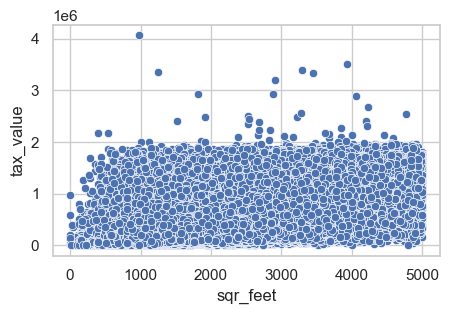

In [9]:
# plot the columns
plt.figure(figsize = (5,3))
sns.scatterplot(data=train, x="sqr_feet", y="tax_value")
plt.show()


In [10]:
# confidence level
alpha = 0.05

# perform the pearson's rcorrelation test
r, p_value = stats.pearsonr(train.sqr_feet, train.tax_value)

# print results
print("coeficient r:", r)
print("p-value:", p_value)
explore_.verify_alpha_(p_value) # compare p-value to alpha

coeficient r: 0.5583485670625855
p-value: 0.0
We have enough evidence to reject the null


- The correlation test shows that there is enough data to say that there is a relationship between square feet and tax valiue and our r-coeficient shows that this relashionship is strong.


**A. Does the mean tax value differ significantly between properties with different square footage**

In [11]:
print("Null_Hyp: The mean tax value differ significantly between properties with different square footage")
print("")
print("Alt_Hyp: The mean tax value does not differ significantly between properties with different square footage")


Null_Hyp: The mean tax value differ significantly between properties with different square footage

Alt_Hyp: The mean tax value does not differ significantly between properties with different square footage


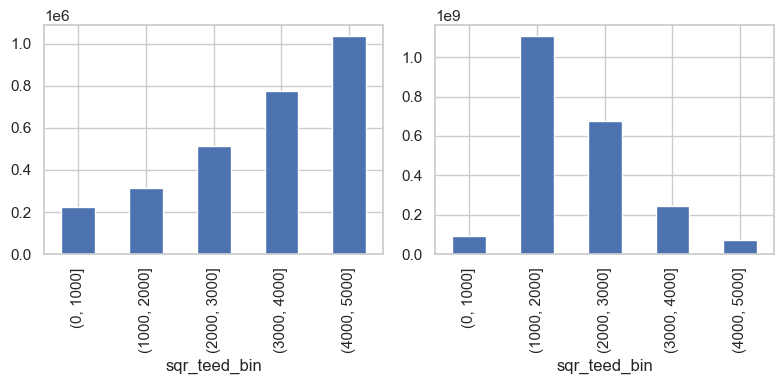

In [12]:
# Define the bin edges
bin_edges = [0, 1000, 2000, 3000, 4000, 5000]

# Create a new column with binned values
train["sqr_teed_bin"] = pd.cut(train.sqr_feet, bins=bin_edges)

# Group the data by the bin column and compute the mean value
grouped_sqr_ft_by_mean_tax_value = train.groupby('sqr_teed_bin').tax_value.mean()
grouped_sqr_ft_by_total_sqr_feet = train.groupby('sqr_teed_bin').sqr_feet.sum()

# Plot the values
fig, ax = plt.subplots(1,2,figsize = (8,4))
grouped_sqr_ft_by_mean_tax_value.plot(kind='bar', ax=ax[0])
grouped_sqr_ft_by_total_sqr_feet.plot(kind="bar", ax=ax[1])
plt.tight_layout()
plt.show()

**Assiptions**

Normal distribution, or at least 30 observations and "kinda" normal for each of the individual groups.

In [15]:
# create the groups to stat test
zero_to_one = train[train.sqr_feet < 1000].sqr_feet
one_to_two = train[(train.sqr_feet >= 1000) & (train.sqr_feet < 2000)].sqr_feet
two_to_three = train[(train.sqr_feet >= 2000) & (train.sqr_feet < 3000)].sqr_feet
three_to_four = train[(train.sqr_feet >= 3000) & (train.sqr_feet < 4000)].sqr_feet
four_to_five = train[(train.sqr_feet >= 4000) & (train.sqr_feet <= 5000)].sqr_feet


**Verify variance quality**

In [18]:
alpha = 0.05

# Verify variance quality
# Perform Levene's test
levene_stat, levene_pvalue = stats.levene(zero_to_one, one_to_two, two_to_three,
                                          three_to_four, four_to_five)

if levene_pvalue > alpha:
    print(f"P-value {levene_pvalue} is greater than alpha: Varience are equal")
else:
     print(f"P-value {levene_pvalue} is less than alpha: Varience are NOT equal")

P-value 0.0 is less than alpha: Varience are NOT equal


**Test statistics**

In [21]:
# Test stats
t_stats, p_value = stats.f_oneway(zero_to_one, one_to_two, two_to_three,
                                          three_to_four, four_to_five)


def Prob_distribution_conclude(t_stats,p_value, alpha=0.05):
    #evaluate p-value
    if (t_stats > 0) and (p_value < alpha):
        print("We reject the null hypothesis")
    else:
        print("We fail to reject the null hypothesis")

Prob_distribution_conclude(t_stats,p_value, alpha)

We reject the null hypothesis


- Stats test show that the mean tax value differ significantly between properties with different square footage

### 2. Do the number of bedrooms or bathrooms impact the tax value?

In [ ]:
print("Null_Hyp: The number of bedrooms or bathrooms don't impact the tax value")
print("")
print("Alt_Hyp: The number of bedrooms or bathrooms impact the tax value")


In [ ]:
# plot the columns
fig, ax = plt.subplots(1,2,figsize = (8,4))
sns.scatterplot(data=train, x="bedrooms", y="tax_value", ax=ax[0])
sns.scatterplot(data=train, x="bathrooms", y="tax_value", ax=ax[1])
plt.show()


In [ ]:
# confidence level
alpha = 0.05

# perform the pearson's rcorrelation test
r, p_value = stats.spearmanr(train.bedrooms, train.tax_value)

# print results
print("coeficient r:", r)
print("p-value:", p_value)
explore_.verify_alpha_(p_value) # compare p-value to alpha

In [ ]:
# confidence level
alpha = 0.05

# perform the pearson's rcorrelation test
r, p_value = stats.spearmanr(train.bathrooms, train.tax_value)

# print results
print("coeficient r:", r)
print("p-value:", p_value)
explore_.verify_alpha_(p_value) # compare p-value to alpha

- The spearmanr test shows that there is enough data to say that there is a relationship between bedrooms and tax valiue and our r-coeficient shows that this relashionship is weak.

- The spearmanr test shows that there is enough data to say that there is a relationship between bedrooms and tax valiue and our r-coeficient shows that this relashionship is moderate.

### 3. Does the county where the property is located affect the tax value?

In [ ]:
print("Null_Hyp: The county where the property is located does not affect the tax value")
print("")
print("Alt_Hyp: The county where the property is located affect the tax value")


In [ ]:
# plot the columns
plt.figure(figsize = (5,3))
sns.scatterplot(data=train, x="county", y="tax_value")
plt.show()


In [ ]:
# confidence level
alpha = 0.05

# perform the pearson's rcorrelation test
r, p_value = stats.spearmanr(train.county, train.tax_value)

# print results
print("coeficient r:", r)
print("p-value:", p_value)
explore_.verify_alpha_(p_value) # compare p-value to alpha

- The spearmanr test shows that there is enough data to say that there is a relationship between county and tax valiue and our r-coeficient shows that this relashionship is very weak.

### 4. Is there a relationship between the number of bedrooms and the square footage of the property?

In [ ]:
print("Null_Hyp: There is a relationship between the number of bedrooms and the square footage of the property")
print("")
print("Alt_Hyp: There is a relationship between the number of bedrooms and the square footage of the property")


In [ ]:
# plot the columns
plt.figure(figsize = (5,3))
sns.scatterplot(data=train, x="year_built", y="tax_value")
plt.show()

In [ ]:
# set significance level
alpha = 0.05

# test stats
chi2, p_value, degreeFreedom, exp_table = stats.chi2_contingency(cont_table)

# print results
print("chi2:", chi2)
print("p-value:", p_value)
print("defrees of freedom:", degreeFreedom, "\n\n")

# conclusion
explore_.verify_alpha_(p_value)

print("Expected")
pd.DataFrame(exp_table)

- The chi-squared test shows that there is enough data to say that there is a relationship between betrooms and square footage.

### 5. Does the year the property was built have any influence on its tax value?

In [ ]:
print("Null_Hyp: The year the property was built have no influence on its tax value")
print("")
print("Alt_Hyp: The year the property was built have influence on its tax value")


In [ ]:
# plot the columns
plt.figure(figsize = (5,3))
sns.scatterplot(data=train, x="year_built", y="tax_value")
plt.show()


In [ ]:
# confidence level
alpha = 0.05

# perform the pearson's rcorrelation test
r, p_value = stats.spearmanr(train.year_built, train.tax_value)

# print results
print("coeficient r:", r)
print("p-value:", p_value)
explore_.verify_alpha_(p_value) # compare p-value to alpha

- The spearmanr test shows that there is enough data to say that there is a relationship between year built and tax valiue and our r-coeficient shows that this relashionship is very weak.